# Part-1 of the Project

## Importing data and preprocessing

### Mounting Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [10]:
import os
os.chdir('/content/drive/MyDrive/3. Computer Vision - CNN/Project Computer Vision')

### Unzipping the data

In [ ]:
os.listdir()
# do not run again

['CNN - Project 1.pdf',
 'Dataset - Plant-seedlings-classification.zip',
 'Dataset - Images.zip',
 'sample_submission.csv',
 'CNN Project-Tury.ipynb']

In [ ]:
plantpath = '/gdrive/MyDrive/Computer Vision - Assignment/Dataset - Plant-seedlings-classification.zip'
# do not run again

In [ ]:
with ZipFile(plantpath, 'r') as f:
  f.extractall()
# do not run again

In [ ]:
os.listdir()
# do not run again

['CNN - Project 1.pdf',
 'Dataset - Plant-seedlings-classification.zip',
 'Dataset - Images.zip',
 'sample_submission.csv',
 'CNN Project-Tury.ipynb',
 'Images',
 'test',
 'train']

All the zipped data has now been unzipped. Let's read the training data via 'cv2' library now.

### Reading the data

In [ ]:
os.chdir('/content/drive/MyDrive/3. Computer Vision - CNN/Project Computer Vision/train')
os.listdir()

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

All the images have been labeled into 12 plant species named folders.

In [ ]:
import cv2
# for image reading

X = []
y = []
# for the dataset to be stored

In [ ]:
# Iterating through each folder and saving folder name as the class label in 'y' 
# while saving each image in that folder within 'X' 
for i in os.listdir():
  print('Currently saving images for the class: '+i)
  for j in os.listdir(i):
    img = cv2.imread('/content/drive/MyDrive/3. Computer Vision - CNN/Project Computer Vision/train/'+i+'/'+j)
    img = cv2.resize(img,(128,128))
    X.append(img)
    y.append(i)

Currently saving images for the class: Black-grass
Currently saving images for the class: Charlock
Currently saving images for the class: Cleavers
Currently saving images for the class: Common Chickweed
Currently saving images for the class: Common wheat
Currently saving images for the class: Fat Hen
Currently saving images for the class: Loose Silky-bent
Currently saving images for the class: Maize
Currently saving images for the class: Scentless Mayweed
Currently saving images for the class: Shepherds Purse
Currently saving images for the class: Small-flowered Cranesbill
Currently saving images for the class: Sugar beet


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
# for plotting the saved images

Label: Black-grass


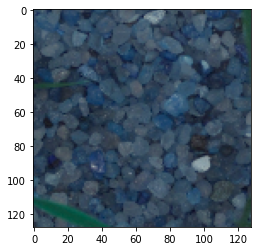

In [ ]:
# verifying if the data was loaded correctly
print('Label: '+ y[99])
plt.imshow(X[99])

In [ ]:
print('Data type of the features data is: ', type(X))
print('Data type of the label data is: ', type(y))
print('Data type of the features data in prod is: ', type(X_prod))

Data type of the features data is:  <class 'list'>
Data type of the label data is:  <class 'list'>
Data type of the features data in prod is:  <class 'list'>


For any kind of data preprocessing and further handling, first we must convert the data into NumPy arrays.

### Conversion of data into NumPy arrays

In [ ]:
import numpy as np

In [ ]:
X = np.array(X)
y = np.array(y)
X_prod = np.array(X_prod)

In [ ]:
# verifying data type after conversion into numpy arrays
print('Data type of the features data now is: ', type(X))
print('Data type of the label data now is: ', type(y))
print('Data type of the features data in prod now is: ', type(X_prod))

Data type of the features data now is:  <class 'numpy.ndarray'>
Data type of the label data now is:  <class 'numpy.ndarray'>
Data type of the features data in prod now is:  <class 'numpy.ndarray'>


### Splitting the data

Now, we can split the data in 'X' and 'y' into train and test sets directly.
However, before that it'd be much better to shuffle the data so that same class items are not mostly next to each other.

In [ ]:
# previewing the first 10 labels before shuffling
y[:10]

array(['Fat Hen', 'Loose Silky-bent', 'Common Chickweed', 'Charlock',
       'Sugar beet', 'Sugar beet', 'Cleavers', 'Shepherds Purse', 'Maize',
       'Loose Silky-bent'], dtype='<U25')

In [ ]:
# shuffling the data
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=10)

In [ ]:
# previewing the first 10 labels after shuffling
y[:10]

array(['Loose Silky-bent', 'Common Chickweed',
       'Small-flowered Cranesbill', 'Common Chickweed', 'Cleavers',
       'Loose Silky-bent', 'Charlock', 'Cleavers', 'Sugar beet',
       'Loose Silky-bent'], dtype='<U25')

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
print('Shape of X train data: ',X_train.shape)
print('Shape of X test data: ',X_test.shape)
print('Shape of y train data: ',y_train.shape)
print('Shape of y test data: ',y_test.shape)

Shape of X train data:  (3325, 128, 128, 3)
Shape of X test data:  (1425, 128, 128, 3)
Shape of y train data:  (3325,)
Shape of y test data:  (1425,)


### Normalising the data

In [ ]:
# normalising the data by dividing by 255
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### Label encoding the labels data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y_train
# previewing the labels before label encoding

array(['Fat Hen', 'Common wheat', 'Black-grass', ..., 'Charlock',
       'Common wheat', 'Scentless Mayweed'], dtype='<U25')

In [ ]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [ ]:
y_train
# previewing the labels after label encoding

array([5, 4, 0, ..., 1, 4, 8])

### Flattening the data for classical supervised learning algorithms

In [ ]:
img_shape = X_train.shape[1:]
img_shape
# shape of each image

(128, 128, 3)

In [ ]:
n_voxels = np.prod(img_shape)
n_voxels
# number of voxels in the 4D data

49152

In [ ]:
print('Elements in train set: ',X_train.shape[:1])
print('Elements in test set: ',X_test.shape[:1])

Elements in train set:  (3325,)
Elements in test set:  (1425,)


In [ ]:
# flattening the data
X_train_flat = X_train.reshape(3325,n_voxels)
X_test_flat = X_test.reshape(1425,n_voxels)

In [ ]:
# verifying shape of data after flattening
print('Shape of the features train data now is: ', X_train_flat.shape)
print('Shape of the features test data now is: ', X_test_flat.shape)

Shape of the features train data now is:  (3325, 49152)
Shape of the features test data now is:  (1425, 49152)


## Supervised Learning algorithm (Logistic Regression) for model training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1 = LogisticRegression(random_state=10)
# defining the model

In [ ]:
model1.fit(X_train_flat,y_train)
# training the model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Supervised Learning algorithm (Logistic Regression) model accuracy

In [ ]:
y_pred1 = model1.predict(X_test_flat)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score1 = accuracy_score(y_test,y_pred1)
print('Accuracy Score of Logistic Reression model is :', score1)

Accuracy Score of Logistic Reression model is : 0.09824561403508772


## Supervised Learning algorithm (SVM) for model training

In [ ]:
from sklearn import svm

In [ ]:
model2 = svm.SVC(gamma=0.001)
# defining the model

In [ ]:
model2.fit(X_train_flat,y_train)
# training the model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Supervised Learning algorithm (SVM) model accuracy

In [ ]:
y_pred2 = model2.predict(X_test_flat)

In [ ]:
score2 = accuracy_score(y_test,y_pred2)
print('Accuracy Score of SVM model is :', score2)

Accuracy Score of SVM model is : 0.11157894736842106


## Supervised Learning algorithm (Decision Tree) for model training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model3 = DecisionTreeClassifier()
# defining the model

In [ ]:
model3.fit(X_train_flat,y_train)
# training the model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Supervised Learning algorithm (Decision Tree) model accuracy

In [ ]:
y_pred3 = model3.predict(X_test_flat)

In [ ]:
score3 = accuracy_score(y_test,y_pred3)
print('Accuracy Score of Decision Tree model is :', score3)

Accuracy Score of Decision Tree model is : 0.09192982456140351


## One Hot Encoding the labels for DNN & CNN

To evaluate the newural nets models, we are going to use crosscategorical entropy. For thi purpose, we must One Hot Encode the labels.

In [ ]:
y_train
# previewing y_train before OHE

array([5, 4, 0, ..., 1, 4, 8])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train,12)
y_test = to_categorical(y_test,12)

In [ ]:
y_train
# previewing y_train after OHE

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Deep Neural Networks (DNN) for model training

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [ ]:
tf.keras.backend.clear_session()
# clearing out any existing model from current memory
model4 = Sequential()
# declaring the model

In [ ]:
model4.add(Flatten(input_shape=(128,128,3)))
model4.add(Dense(128,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(12,activation='softmax'))
# defining the model

In [ ]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
n_epochs = 100
batch_size = 32
history1 = model4.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/100
104/104 [==============================] - 4s 13ms/step - loss: 4.4572 - accuracy: 0.0999 - val_loss: 2.4672 - val_accuracy: 0.1088
Epoch 2/100
104/104 [==============================] - 1s 11ms/step - loss: 2.4716 - accuracy: 0.1184 - val_loss: 2.4479 - val_accuracy: 0.1382
Epoch 3/100
104/104 [==============================] - 1s 11ms/step - loss: 2.4493 - accuracy: 0.1311 - val_loss: 2.4324 - val_accuracy: 0.1382
Epoch 4/100
104/104 [==============================] - 1s 11ms/step - loss: 2.4395 - accuracy: 0.1294 - val_loss: 2.4216 - val_accuracy: 0.1382
Epoch 5/100
104/104 [==============================] - 1s 10ms/step - loss: 2.4291 - accuracy: 0.1455 - val_loss: 2.4146 - val_accuracy: 0.1382
Epoch 6/100
104/104 [==============================] - 1s 11ms/step - loss: 2.4190 - accuracy: 0.1352 - val_loss: 2.4114 - val_accuracy: 0.1382
Epoch 7/100
104/104 [==============================] - 1s 11ms/step - loss: 2.4227 - accuracy: 0.1422 - val_loss: 2.4095 - val_accuracy:

## Deep Neural Networks (DNN) model accuracy

In [ ]:
score4 = model4.evaluate(X_test,y_test)

45/45 [==============================] - 0s 5ms/step - loss: 2.4061 - accuracy: 0.1382


In [ ]:
print('Accuracy Score of DNN model is :', score4[1])

Accuracy Score of DNN model is : 0.1382456123828888


## Convolution Neural Networks (CNN) for model training

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
tf.keras.backend.clear_session()
# clearing out any existing model from current memory
model5 = Sequential()
# declaring the model

In [ ]:
model5.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(128,128,3)))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Flatten())
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(32,activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(12,activation='softmax'))
# defining the model

In [ ]:
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
n_epochs = 100
batch_size = 32
history2 = model5.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_test,y_test))

Epoch 1/100
104/104 [==============================] - 31s 40ms/step - loss: 2.5245 - accuracy: 0.1127 - val_loss: 2.4150 - val_accuracy: 0.2632
Epoch 2/100
104/104 [==============================] - 4s 35ms/step - loss: 2.4096 - accuracy: 0.1725 - val_loss: 2.2095 - val_accuracy: 0.2618
Epoch 3/100
104/104 [==============================] - 4s 34ms/step - loss: 2.2393 - accuracy: 0.2481 - val_loss: 2.0215 - val_accuracy: 0.3586
Epoch 4/100
104/104 [==============================] - 4s 35ms/step - loss: 2.1274 - accuracy: 0.2598 - val_loss: 1.8040 - val_accuracy: 0.3789
Epoch 5/100
104/104 [==============================] - 4s 34ms/step - loss: 1.9996 - accuracy: 0.2796 - val_loss: 1.7499 - val_accuracy: 0.3993
Epoch 6/100
104/104 [==============================] - 4s 35ms/step - loss: 1.9438 - accuracy: 0.2912 - val_loss: 1.7204 - val_accuracy: 0.4295
Epoch 7/100
104/104 [==============================] - 4s 35ms/step - loss: 1.9304 - accuracy: 0.2818 - val_loss: 1.7122 - val_accuracy

## Convolution Neural Networks (CNN) model accuracy

In [ ]:
score5 = model5.evaluate(X_test,y_test)

45/45 [==============================] - 1s 12ms/step - loss: 2.1528 - accuracy: 0.5523


In [ ]:
print('Accuracy Score of CNN model is :', score5[1])

Accuracy Score of CNN model is : 0.5522807240486145


## Comparing model accuracies

In [ ]:
print('Accuracy Score of Logistic Reression model is :', score1)
print('Accuracy Score of SVM model is :', score2)
print('Accuracy Score of Decision Tree model is :', score3)
print('Accuracy Score of DNN model is :', score4[1])
print('Accuracy Score of CNN model is :', score5[1])

Accuracy Score of Logistic Reression model is : 0.09824561403508772
Accuracy Score of SVM model is : 0.11157894736842106
Accuracy Score of Decision Tree model is : 0.09192982456140351
Accuracy Score of DNN model is : 0.1382456123828888
Accuracy Score of CNN model is : 0.5522807240486145


After the above comparison of model accuracies, it is clear that CNN performs the best out of this lot.

In [ ]:
model5.save('CNN_Classifier.h5')
# saving the best model

## Importing images from image folder to predict the class

In [ ]:
os.chdir('/content/drive/MyDrive/3. Computer Vision - CNN/Project Computer Vision/test')

In [ ]:
X_prod = []
# Iterating through each image in 'test' folder and saving within 'X_prod'
for i in os.listdir():
  img = cv2.imread('/content/drive/MyDrive/3. Computer Vision - CNN/Project Computer Vision/test/'+i)
  img = cv2.resize(img,(128,128))
  X_prod.append(img)

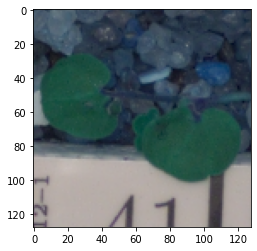

In [ ]:
# verifying if the testing data was loaded correctly
plt.imshow(X_prod[99])

In [ ]:
from keras.models import load_model

In [ ]:
classifier = load_model('CNN_Classifier.h5')
# loading the saved / pickled model

In [ ]:
y_predicted = classifier.predict(X_prod)
# using the best trained image classifier model to predict the class

Let's have a look at few of the prod images and their predicted labels.

Predicted Label: 9


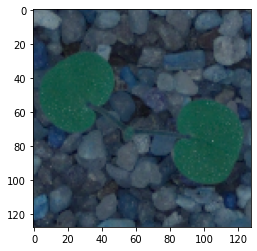

Predicted Label: 0


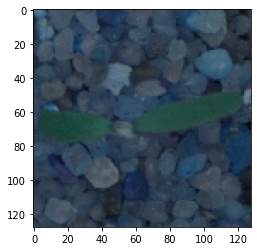

Predicted Label: 0


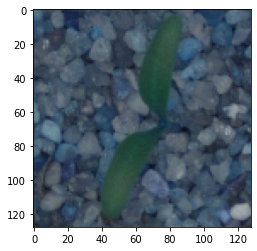

Predicted Label: 3


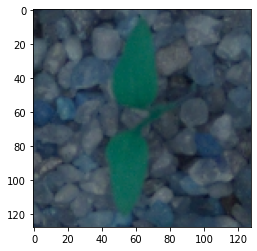

Predicted Label: 7


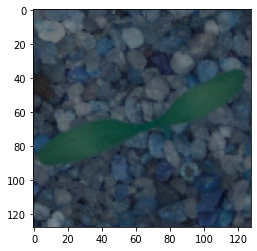

Predicted Label: 3


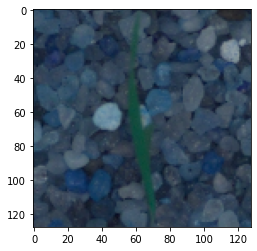

Predicted Label: 3


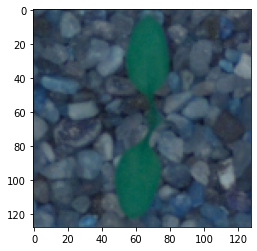

Predicted Label: 0


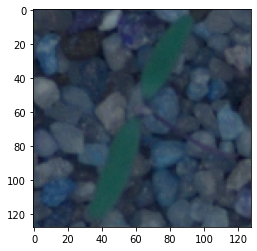

Predicted Label: 0


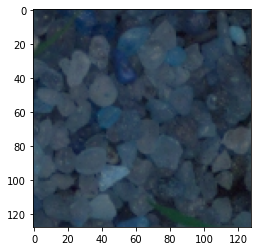

Predicted Label: 0


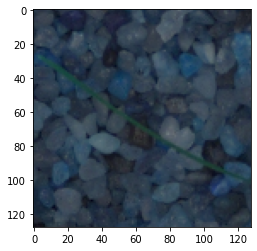

In [ ]:
for i in range (10):
  pred = np.argmax(y_predicted[i])
  print('Predicted Label: {}'.format(pred))
  plt.imshow(X_prod[i])
  plt.show()

# Part-2 of the Project

**Key Takeaways**:

* Classical supervised learning algorithms like Logistic Regression, Support Vector Machine, and Decision Tree perform very badly on this data (around 10% accuracy).
* The reason being that the data we have provided to these models are image data flattened into a single array / tensor. There is no way that these models can find patterns of pixel intensity changes via this info.
* DNN (Deep Neural Network) performs a little better than the classical superised learning algorithms, but the performace is not reasonably good.
* CNN (Convolution Neural Network) perform the best out of this lot.

**Let's try and understand why:**
* Images constitute of information in the form of the smallest units known as pixels.
* In essence, a machine reads the pixel data as numbers ranging from 0 to 255, and across 1 channel if the image is greyscale; and 3 channels if the image is colured (RGB).
* To understand an image the human brain, looks for distinct patterns within the image.
* For a machine to learn as a human does, meaningful features must be taken out of the image.
* For this reason, classical supervised learning algorithms cannot detect or classify an image on its own, but can do a fairly okay job if the features are extracted manually and passed onto them.
* Deep Neural Networks (DNN) also peforms similar to classical supervised learning algorithms when raw image data is passed into them.
* Hence, in the domain of image classification - features of an image play the most important role.
* This is where Convolution Neural Networks (CNN) outperforms other algorithms, by being able to find features from an image data using pixel intensity gradients. The CNN has convolution layers which act as a features extractor, and then neural network from there on help in the classification.

# Part-3 of the Project

## Unzipping the data

In [ ]:
imgpath = '/content/drive/MyDrive/3. Computer Vision - CNN/Project Computer Vision/Dataset - Images.zip'
# do not run again

In [ ]:
from zipfile import ZipFile
with ZipFile(imgpath,'r') as f:
  f.extractall()
# do not run again

## Importing the manually labelled features

In [6]:
os.chdir('/content/drive/MyDrive/3. Computer Vision - CNN/Project Computer Vision')

In [7]:
import pandas as pd

In [8]:
carMake = pd.read_csv('carMake.csv')

In [9]:
carMake
# viewing the manually created features data

,Sl. No.,Image Id,Colour,Make,Manufacturer,Type
0,1,00001.jpg,White,Audi,Volkswagen AG,Coupe
1,2,00002.jpg,Black,Acura,Honda,Sedan
2,3,00003.jpg,Red,Dodge,Stellantis,Pickup Truck
3,4,00004.jpg,Red,Hyundai,Hyundai Motor Group,Sedan
4,5,00005.jpg,White,Ford,Ford Motor Company,Pickup Truck
5,6,00006.jpg,Red,Chevrolet,General Motors,Convertible
6,7,00007.jpg,Blue,Dodge,Stellantis,Sport Utility Vehicle
7,8,00008.jpg,Red,Dodge,Stellantis,Sedan
8,9,00009.jpg,Grey,Mitsubishi,Mitsubishi Motors,Sedan
9,10,000010.jpg,Grey,Chevrolet,General Motors,Station Wagon


## Image Data Curation

In [20]:
images = ['https://drive.google.com/uc?export=view&id=1-6EsZohPw4Xc_MzAKz-byrnghiV9JVU2',
          'https://drive.google.com/uc?export=view&id=1-Gj6lTh0tmXdNE3WyodfUK8AQmAOSL8R',
          'https://drive.google.com/uc?export=view&id=1-Q11yjwdCbtw_-ah03kf5MqLQV5PmnmS',
          'https://drive.google.com/uc?export=view&id=1-QbSaqVvxOnXgoNE0eTRGxo-3Gohl1vc',
          'https://drive.google.com/uc?export=view&id=1-9rNcz8EuzQ32UAMxrE6sSkei3CXfTVq',
          'https://drive.google.com/uc?export=view&id=1070i8kJOV2I1Zcv0Xt13l_gZHR2_Iej8',
          'https://drive.google.com/uc?export=view&id=102cxUaoXoyXCoHHHw3ilCvBd6Zi3pfrS',
          'https://drive.google.com/uc?export=view&id=1-D1GltKqsPjGKFCJaK5jdgmfrkO8hZDp'
          'https://drive.google.com/uc?export=view&id=102cxUaoXoyXCoHHHw3ilCvBd6Zi3pfrS',
          'https://drive.google.com/uc?export=view&id=1-p-UW0gjU7OydIHaGBLDVIBj9ofc2pYP',
          'https://drive.google.com/uc?export=view&id=1-NweOHJE28F1eB-X2XP8rHcwEXcqtFU3',
          'https://drive.google.com/uc?export=view&id=1-2F6x4vVhM93hS-PA0SdQEz9Q7GKtFBN',
          'https://drive.google.com/uc?export=view&id=1-yJIJJSjAsGWfsPWpXh9PGAKNuf1lX3q',
          'https://drive.google.com/uc?export=view&id=1-Ft4lo2QhkG-M_uw1X_Nr-QDNS1iKDvq',
          'https://drive.google.com/uc?export=view&id=1-H6Iss4ciR62a0LD5rmB7VLPBoPvvYtW',
          'https://drive.google.com/uc?export=view&id=100JIPkkSFagGwlCL9e5ZFTbnrGMvp_ep']
# passing the images link from Google drive into a list

In [21]:
carMake['Image'] = images
# passing the images links list into the DataFrame

In [22]:
from IPython.core.display import HTML

In [23]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="100" >'
# defining a function to convert image into HTML

In [24]:
carMakeHTML = carMake.to_html(escape=False, formatters=dict(Image=path_to_image_html))
# saving the updated DataFrame as HTML

We shall now view the manually entered features for each image along side the image itself.

In [25]:
HTML(carMakeHTML)

,Sl. No.,Image Id,Colour,Make,Manufacturer,Type,Image
0,1,00001.jpg,White,Audi,Volkswagen AG,Coupe,
1,2,00002.jpg,Black,Acura,Honda,Sedan,
2,3,00003.jpg,Red,Dodge,Stellantis,Pickup Truck,
3,4,00004.jpg,Red,Hyundai,Hyundai Motor Group,Sedan,
4,5,00005.jpg,White,Ford,Ford Motor Company,Pickup Truck,
5,6,00006.jpg,Red,Chevrolet,General Motors,Convertible,
6,7,00007.jpg,Blue,Dodge,Stellantis,Sport Utility Vehicle,
7,8,00008.jpg,Red,Dodge,Stellantis,Sedan,
8,9,00009.jpg,Grey,Mitsubishi,Mitsubishi Motors,Sedan,
9,10,000010.jpg,Grey,Chevrolet,General Motors,Station Wagon,


**Key takeaways**
* This task gave a very good overview of what every meaningful data must go through, before being used for any prediction or classification business AIML solution - i.e. labelling.
* Data labelling task was very important in understanding the cruciality of domain knowledge in a Data Science project. Input data - if labelled incorrectly, can bring the whole Data Science project on its knees.
* While trying to understand how to extract features from these automobiles images, we learnt a great deal about the popular manufacturers and types of cars.